In [2]:
import cv2
from skimage import exposure
from skimage.filters import unsharp_mask
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# carregar a imagem
img = cv2.imread('Carcinoma_40x.jpg')

In [7]:
# Normaliza as cores por histograma
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img[:,:,0] = clahe.apply(img[:,:,0])
img[:,:,1] = clahe.apply(img[:,:,1])
img[:,:,2] = clahe.apply(img[:,:,2])

# aplicar redução de ruído com filtro bilateral
img_noise = cv2.bilateralFilter(img, 7, 75, 75)

# aplicar equalização de histograma
img_eq = exposure.equalize_hist(img_noise)

In [20]:
# aplicar normalização de textura
#img_norm_texture = unsharp_mask(img_eq, radius=4, amount=4)

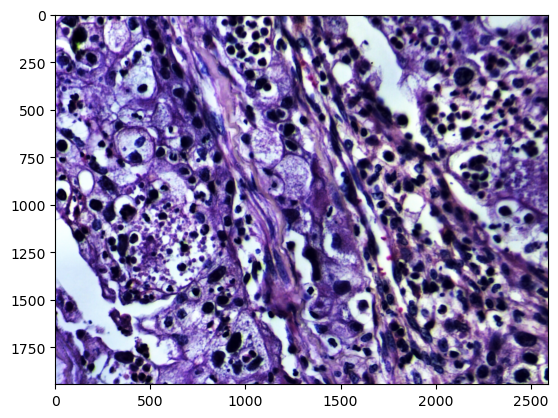

In [8]:
# salvar a imagem com pré-processamento completo
#cv2.imwrite('histo_img_preprocessed.jpg', img_norm_texture)
plt.imshow(img_eq)

In [22]:
cv2.imwrite('histo_img_preprocessed.jpg', img_norm_texture)

True